
# What features determine the price of an Airbnb rental?

In [11]:
!pip install matplotlib
!pip install seaborn
!pip install folium

  Using cached folium-0.12.1-py2.py3-none-any.whl (94 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)


In [12]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

## Some basic data exploration

We begin by loading the data and looking at its basic shape:

In [2]:
listings = pd.read_csv('data/airbnb_nyc.csv', delimiter=',')
listings.shape

(30179, 81)

We display the basic listings data:

In [4]:
pd.options.display.max_columns = 100
listings.head(3)

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1


### Plotting the marginal distributions of key quantities of interest

As you have seen in the Python cases, it is good to first develop an idea of how the values of a few key quantities of interest are distributed. We always start investigating by gaining an overhead view of various parameters in our data. Let's start by doing so for some numeric variables, such as ```price```, ```bedrooms```, ```bathrooms```, ```number_of_reviews```.

### Example 1

Use the [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) command to compute some important summary statistics for the above variables.

**Answer.** One possible solution is given below:

In [5]:
listings[['price','bedrooms','bathrooms','number_of_reviews']].describe()

,price,bedrooms,bathrooms,number_of_reviews
count,30179.000000,30179.000000,30179.000000,30179.000000
mean,132.949965,1.265516,1.151595,4.459889
std,93.151824,0.614659,0.422225,5.265633
min,0.000000,1.000000,0.500000,0.000000
25%,65.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,1.000000,2.000000
75%,175.000000,1.000000,1.000000,7.000000
max,500.000000,11.000000,7.500000,20.000000


In [6]:
listings[['price','bedrooms','bathrooms','number_of_reviews']].quantile([0.9,0.95,0.99])

,price,bedrooms,bathrooms,number_of_reviews
0.90,250.0,2.0,2.0,13.0
0.95,325.0,3.0,2.0,16.0
0.99,450.0,4.0,2.5,20.0


### Exercise 1

Plot the histograms of the above variables.

**Answer.**

<AxesSubplot:title={'center':'Price'}, ylabel='Frequency'>

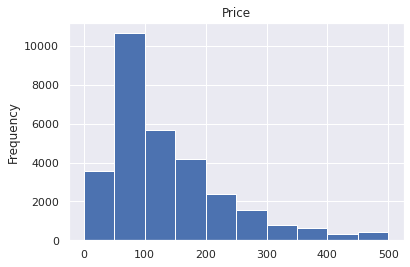

In [13]:
listings['price'].plot.hist(title = "Price")

<AxesSubplot:title={'center':'Bedrooms'}, ylabel='Frequency'>

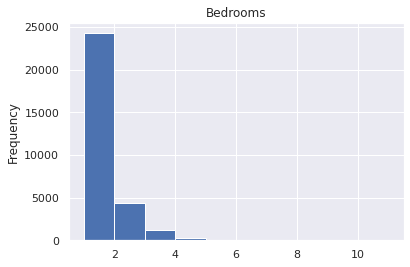

In [20]:
listings['bedrooms'].plot.hist(title = "Bedrooms")

<AxesSubplot:title={'center':'Bathrooms'}, ylabel='Frequency'>

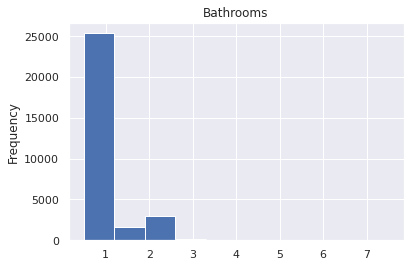

In [22]:
listings['bathrooms'].plot.hist(title = "Bathrooms")

<AxesSubplot:title={'center':'Number of Reviews'}, ylabel='Frequency'>

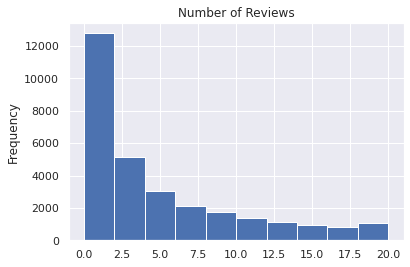

In [23]:
listings['number_of_reviews'].plot.hist(title = "Number of Reviews")

-------

## Inspecting price against variables of interest

Using `seaborn`, we can create box plots in which the data are grouped by a second column. For instance:

Text(0.5, 1.0, 'Boxplot of Price vs. bedrooms')

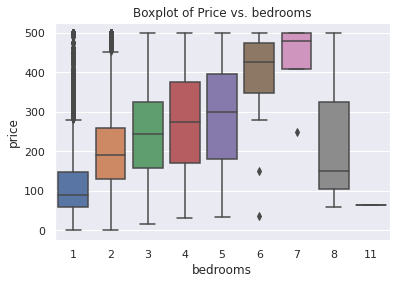

In [14]:
sns.boxplot(x = "bedrooms", y='price', data = listings)
plt.title("Boxplot of Price vs. bedrooms")

### Exercise 2

Create box plots of `price` vs. `bathrooms`, `price` vs. `number_of_reviews`, and `price` vs. `review_scores_cleanliness`.

**Answer.**

Text(0.5, 1.0, 'Boxplot of Price v. Bathrooms')

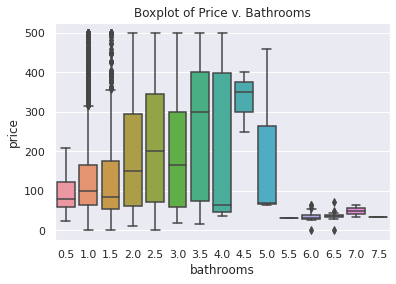

In [16]:
sns.boxplot(x = 'bathrooms', y='price', data = listings)
plt.title('Boxplot of Price v. Bathrooms')

Text(0.5, 1.0, 'Boxplot of Price v. Number of Reviews')

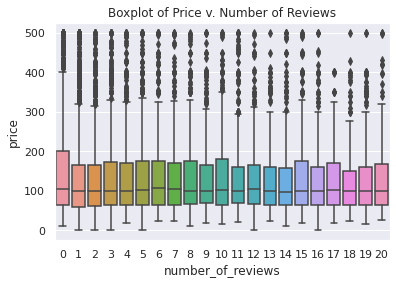

In [17]:
sns.boxplot(x = 'number_of_reviews', y='price', data = listings)
plt.title('Boxplot of Price v. Number of Reviews')

Text(0.5, 1.0, 'Boxplot of Price v. Reviews Scores Cleanliness')

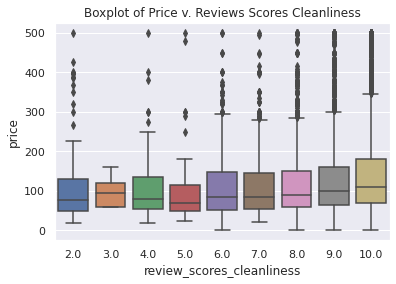

In [18]:
sns.boxplot(x = 'review_scores_cleanliness', y='price', data = listings)
plt.title('Boxplot of Price v. Reviews Scores Cleanliness')

-------

## Investigating correlations

To calculate correlation coefficients, we use [**`.corr()`**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) from `pandas`. For instance, to find the correlation $r$ between `price` and `bedrooms`, we can run this line:

In [24]:
listings[["price", "bedrooms"]].corr()

,price,bedrooms
price,1.000000,0.454539
bedrooms,0.454539,1.000000


This gives you a **correlation matrix** that tells you that

$$
r_{price,price} = 1\\
r_{price,bedrooms} = r_{bedrooms,price} = 0.454539
$$

If you want to extract only $r_{price,bedrooms}$, you can index the resulting object like this:

This would be the correlation matrix for all the variables in the DataFrame:

In [25]:
corrm = listings.corr()
corrm

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
id,1.000000,0.567767,0.530654,0.103325,0.062122,0.071475,-0.351613,-0.005784,0.109353,0.095344,0.041364,0.052900,0.081639,0.027533,0.073860,0.015423,0.000090,NaN,0.275434,0.310207,0.323030,0.241093,-0.099074,0.281097,0.005712,-0.008610,0.051732,-0.026479,-0.046465,0.061172,0.018077,0.370174,0.119937,0.098897,0.111743,0.074851,0.557623,-0.238283,0.053860,0.001858,0.061554,0.073392,0.038773,0.197887,0.087920,0.007983,0.189066,0.179178,0.018486,-0.012869,0.060977,-0.335233,0.093657,0.065741,0.067887,-0.019574,0.004068,0.133459,-0.055286,0.264720,-0.062950,0.143029,0.002802,-0.074635,0.026211
host_id,0.567767,1.000000,0.905404,0.031051,0.002383,0.036721,-0.471233,0.025581,0.128454,0.103469,0.058319,0.055659,0.114607,0.028931,0.093609,0.030244,0.000424,NaN,0.293828,0.333110,0.350964,0.299765,-0.031790,0.191829,-0.082189,-0.089129,-0.001015,-0.084407,-0.105143,-0.016744,-0.063119,0.304739,0.150896,0.125094,0.140272,0.075075,0.431707,-0.149752,0.048199,-0.004128,0.006306,0.015449,0.024602,0.161820,0.024614,0.043710,0.140030,0.106922,-0.043834,-0.013130,0.034135,-0.233112,0.051000,0.008452,0.033211,-0.001314,-0.020248,0.121658,-0.046604,0.164151,-0.051488,0.039264,0.000612,-0.033810,0.014483
host_since,0.530654,0.905404,1.000000,0.029362,-0.005315,0.056799,-0.460919,0.043202,0.133671,0.059946,0.037348,0.021578,0.082001,-0.009671,0.051555,0.000478,-0.003294,NaN,0.239441,0.273200,0.291389,0.242459,-0.052206,0.162810,-0.090009,-0.087586,-0.022991,-0.082780,-0.104489,-0.027066,-0.065790,0.289922,0.144230,0.119375,0.134057,0.077951,0.360644,-0.126710,0.026867,-0.000546,0.003265,0.006753,0.026418,0.137461,0.023077,0.036480,0.115689,0.082969,-0.047184,-0.005512,0.034853,-0.213517,0.033959,0.003663,0.032550,0.008638,-0.024976,0.102444,-0.037173,0.134174,-0.033657,0.027736,0.017108,-0.038432,0.020046
host_response_rate,0.103325,0.031051,0.029362,1.000000,0.133280,0.071515,-0.021462,-0.000586,0.018393,0.067337,0.041781,0.037776,0.046493,0.034280,0.048346,0.012583,-0.002015,NaN,-0.096749,-0.092871,-0.090221,-0.043331,0.101951,0.144492,0.050464,0.047434,0.073322,0.056361,0.064596,0.032622,0.037690,0.130772,0.080812,0.073679,0.041405,0.029622,0.167471,-0.001621,0.036806,0.023568,0.058347,0.047595,0.013415,0.129689,-0.015465,0.019995,0.124320,0.116666,0.024969,-0.015566,0.005100,-0.015891,0.066006,0.065656,0.036693,0.011373,0.074723,0.089964,-0.007350,0.056537,-0.009455,0.112369,-0.043715,0.019444,-0.020509
host_is_superhost,0.062122,0.002383,-0.005315,0.133280,1.000000,-0.021501,-0.000838,-0.017228,0.064378,0.026010,-0.003154,0.022136,0.020835,-0.016325,0.038419,0.065973,0.048219,NaN,0.034459,0.051846,0.062296,0.084598,0.246618,0.278945,0.113434,0.096486,0.118412,0.079193,0.081936,0.047967,0.091963,0.009774,-0.002636,-0.041604,0.199202,-0.016710,0.102082,-0.002945,0.039159,0.012663,0.026205,0.065132,0.017904,0.142496,0.021276,0.027264,0.137013,0.134466,0.007642,-0.051817,-0.027200,-0.003716,0.179669,0.074773,0.091193,-0.01834

### Exercise 3

Write code to print the columns which are positively correlated with `price`, from most positive to least positive. Similarly, print the columns which are negatively correlated, from most negative to least negative.

**Answer.**

In [30]:
pos_cor = corrm['price'] >0
corrm['price'][pos_cor].sort_values(ascending = False).to_frame()

,price
price,1.000000
accommodates,0.571541
bedrooms,0.454539
beds,0.421355
guests_included,0.321970
tv,0.271563
elevator,0.229610
calculated_host_listings_count_entire_homes,0.218890
white_goods,0.214283
gym,0.209892


In [31]:
neg_cor = corrm['price'] <0
corrm['price'][neg_cor].sort_values(ascending = True).to_frame()

,price
longitude,-0.294196
calculated_host_listings_count_private_rooms,-0.127504
calculated_host_listings_count_shared_rooms,-0.101389
smoking_allowed,-0.054131
host_greeting,-0.051356
number_of_reviews,-0.029229
host_identity_verified,-0.022861
parking,-0.019383
host_is_superhost,-0.016325
number_of_reviews_ltm,-0.011481


-------

## Location, location, location!

Let's create an interactive map of New York. This can be easily done with the `folium` package:

In [26]:
folium_map = folium.Map()
folium_map

This is certainly a nice map, but it is not a map of New York yet. We know that New York's coordinates are latitude 40.738 (Northern hemisphere) and longitude -73.98 (Western hemisphere), so let's set that as the center of our map:

In [32]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords)
folium_map

This looks much better. We can set a default zoom that gives a closer view of the city:

In [33]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=13)
folium_map

We can also change the title (the default is `OpenStreetMap`):

In [34]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=13, tiles="OpenStreetMap")
folium_map

### Exercise 4 (optional)

There are other styles available for the `tiles` argument:

* `Stamen Toner`
* `Stamen Terrain`
* `Stamen Watercolor`
* `CartoDB positron`
* `CartoDB dark_matter`

Experiment with each one of these styles and take a screenshot of your favorite one. Then share it with the class.

### Using heat maps to understand the price distribution with location

Next, we create a heat map of the price of apartments in NYC. This will give us a sense of where the important locations are. First, the canvas:

In [39]:
folium_hmap = folium.Map(location=ny_coords, zoom_start=13, tiles="Stamen Watercolor")

Now we prepare the data. `folium` needs a list in which each element contains the `latitude`, the `longitude`, and the `price` of the listing. We can use Python's handy [**`zip()`**](https://www.w3schools.com/python/ref_func_zip.asp) function, which takes two iterables and matches their elements one-by-one pairwise, like this:

![The zip function](data/images/zip_function.png)

**Note:** In order to inspect the elements inside a `zip` object, we first need to convert it into a list.

In [40]:
my_zip = zip(listings['latitude'], listings['longitude'], listings['price'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(40.64749, -73.97237, 149),
 (40.80902, -73.9419, 150),
 (40.79685, -73.94872, 190),
 (40.65599, -73.97519, 60),
 (40.86754, -73.92639, 80),
 (40.63702, -73.96327, 150),
 (40.66278, -73.97966, 120),
 (40.65944, -73.96238, 150),
 (40.68554, -73.9409, 115),
 (40.73961, -73.98074, 200),
 (40.72004, -73.99104, 110),
 (40.6734299999999, -73.98338, 225),
 (40.65401, -73.96323, 130),
 (40.72912, -73.98057, 50),
 (40.68634, -73.966, 98)]

The next step is to create a `HeatMap` layer with the data:

In [37]:
hm_layer = HeatMap(list_of_my_zip,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.2,
                   radius=8,
                   blur=6, 
                 )

We can finally add this layer to our map and see the result:

In [41]:
folium_hmap.add_child(hm_layer)
folium_hmap

Let's save the map as HTML, so that we can share it later with people who don't have Jupyter in their computers. As HTML files, Folium maps can be visualized using any modern browser.

In [42]:
folium_hmap.save("hmap.html")

To test that everything worked correctly, go to your folder and look for the `hmap.html` file. Then open it with your browser.

### Exercise 5 (optional)

Make a heat map using `folium` like the one we just made, only this time make the temperature of the map dependent on `review_score_rating` rather than on `price`.

**Hint:** You will need to remove null values from your DataFrame. To avoid discarding rows that contain useful data for the analyses that come after this exercise, don't overwrite `listings` - rather, create a new DataFrame that does not contain nulls and make your map with that.

**Answer.**

In [47]:
folium_hmap = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")
listings_no_nans = listings.dropna()
hm_wide = HeatMap( list(zip(listings_no_nans['latitude'], listings_no_nans['longitude'], listings_no_nans['review_scores_rating'])),
                   min_opacity=0.2,
                   radius=8, blur=6, 
                   max_zoom=15, 
                 )
folium_hmap.add_child(hm_wide)

-------

When looking at the list of correlations, ```parking``` stood out as having a surprisingly negative correlation with price. We've seen that location has a strong influence on price; let's see if it can help explain the negative correlation exhibited by ```parking```.

### Example 2

Write code here to plot the first 1,000 locations on the map where parking is available in blue color, and the first 1000 locations where parking is not available in red color.

**Hint:** You can use the commands `color = "blue"` and `color = "red"` respectively.

**Answer.** One possible solution is given below:

In [43]:
lat_log_parking_yes = listings.loc[ listings['parking']==1.0, ["latitude","longitude" ] ]
lat_log_parking_no = listings.loc[ listings['parking']==-1.0, ["latitude","longitude" ] ]
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")
for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_parking_yes["latitude"].iloc[i],lat_log_parking_yes["longitude"].iloc[i]],radius=5,color="blue",fill=True)
    marker.add_to(folium_map)

for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_parking_no["latitude"].iloc[i],lat_log_parking_no["longitude"].iloc[i]],radius=5,color="red",fill=True)
    marker.add_to(folium_map)    
    
folium_map

## Interaction effects

Let's find the correlation between `price` and `parking` for each `neighborhood`. This is easily done with the `.groupby()` method:

In [44]:
cbn = listings.groupby("neighbourhood")[["price", "parking"]].corr()
cbn

price   parking
neighbourhood                            
Allerton      price    1.000000  0.188982
              parking  0.188982  1.000000
Alphabet City price    1.000000  0.107394
              parking  0.107394  1.000000
Annadale      price    1.000000  1.000000
...                         ...       ...
Woodhaven     parking  0.143018  1.000000
Woodlawn      price    1.000000  1.000000
              parking  1.000000  1.000000
Woodside      price    1.000000 -0.170445
              parking -0.170445  1.000000

[372 rows x 2 columns]

Let's filter out redundant information:

In [45]:
cbn = cbn.reset_index()
cbn = cbn.drop(columns=["parking"])
cbn.columns = ["neighbourhood", "variable", "r_parking_price"]
cbn = cbn[cbn["variable"]=="parking"]
cbn = cbn.drop(columns=["variable"])
cbn

,neighbourhood,r_parking_price
1,Allerton,0.188982
3,Alphabet City,0.107394
5,Annadale,1.000000
7,Astoria,0.086911
9,Bath Beach,-1.000000
...,...,...
363,Williamsburg,0.075120
365,Windsor Terrace,0.120691
367,Woodhaven,0.143018
369,Woodlawn,1.000000


### Exercise 6

Find out how many neighborhoods present a strongly negative, mildly negative, mildly positive, and strongly positive correlation between `price` and `parking`. Specifically, we want to know how many neighborhoods show a correlation between -1 and -0.5, between -0.5 and 0, between 0 and 0.5 and between 0.5 and 1.

**Hint:** For this, you can use the [`.plot.hist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html) method again, this time specifying the bins you want the data to be split into.

**Answer.**

<AxesSubplot:title={'center':'Histogram of neighborhood level correlation'}, ylabel='Frequency'>

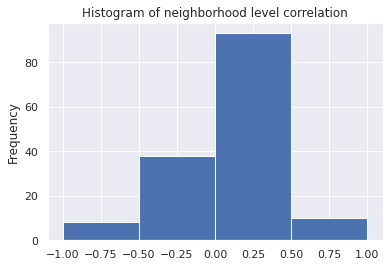

In [46]:
cbn["r_parking_price"].plot.hist(
    bins = [-1, -0.5, 0, 0.5, 1],
    title = "Histogram of neighborhood level correlation")

-------

### Exercise 7

Create four density plots that overlay the distribution of price for parking and non-parking, for each of the following neighborhoods: `St. George`, `Greenwood Heights`, `Rego Park`, and `Brooklyn Navy Yard`.

**Hint:** Use the [`sns.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function and the `hue` argument.

**Answer.**

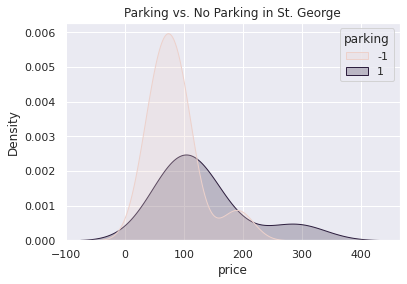

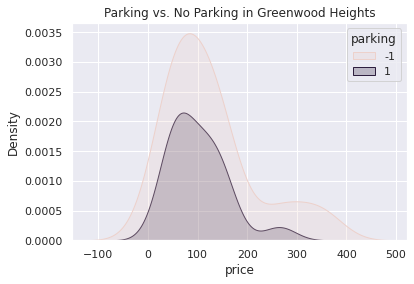

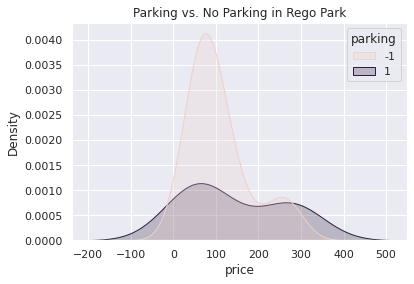

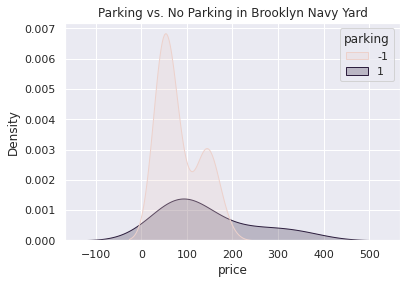

In [49]:
neigh_to_look = ['St. George','Greenwood Heights','Rego Park','Brooklyn Navy Yard']
for neigh in neigh_to_look:
    data_plot = listings[listings['neighbourhood'] == neigh]
    sns.kdeplot(data=data_plot,x='price', hue='parking', shade = True, label="Parking")
    plt.title("Parking vs. No Parking in " + neigh)
    plt.show()

-------

### Exercise 8

Plot average property price across all locations as a time series. The relevant dataset is `data/scal.csv`.

**Hint:** Use the `pd.to_datetime()` function with the `format="%Y%m%d"` argument to process the dates.

**Answer.**

<AxesSubplot:title={'center':'Average price vs. date'}, xlabel='date'>

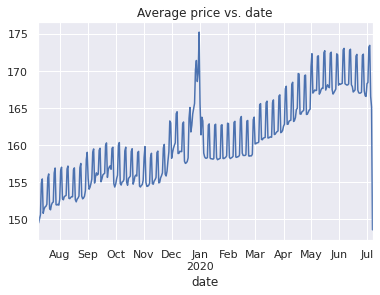

In [50]:
scal = pd.read_csv("data/scal.csv")
scal["date"] = pd.to_datetime(scal["date"], format="%Y%m%d")
scal.groupby("date")["price"].mean().plot(title="Average price vs. date")

-------

## Attribution

"New York", Inside Airbnb, [Public Domain](http://creativecommons.org/publicdomain/zero/1.0/), http://insideairbnb.com/get-the-data.html